## Assignment 2: $k$ Nearest Neighbor

### Do any four.

**Q1.** Please answer the following questions.
1. What is the difference between regression and classification?
The difference between regression and classification is that regression predicts a continuous numeric value while classification predicts a category/class.
2. What is a confusion table/matrix? What does it help us understand about a model's performance? 
A confusion matrix is a table comparing actual vs predicted class labels so it helps you understand which classes the model predicts well, which classes get confused with each other, etc.
3. What is Accuracy? Why might it not be entirely sufficient to evaluate a classifer's predictive performance?
Accuracy is the number of correct predictions divided by the total predictions. It might not be entirely sufficient to evaluate a classifer's predictive performance because if classes are imbalanced a model can get high accuracy by always predicting the majority class. Also it doesnt tell you which mistakes are happening.
4. What does the root mean squared error quantify about a particular model?
RMSE measures the typical size of prediction errors in regression.
5. What are overfitting and underfitting? 
Overfitting makes the model too flexible that memorizes training noise then leads to great training performance but poor test performance. Underfitting makes the model too simple that misses patterns and leads to bad on training and test.
6. Why does splitting the data into training and testing sets, and choosing $k$ by evaluating accuracy or RMSE on the test set, improve model performance?
Splitting the data into training and testing sets and choosing k by evaluating accuracy improves model performance because the k generalizes the new data that the training data can be used to fit the model and it tests/validates data by simulating future unseen cases. It helps avoid picking a k that only looks good because it overfits training data.
7. With classification, we can report a class label as a prediction or a probability distribution over class labels. Please explain the strengths and weaknesses of each approach.
So the strengths of predicting a class label is that its simple and easy to interpret however its weaknesses are it hides uncertainty. Also, the strengths of predicting probability distribution over classes is that it gives uncertainty plus lets you set thresholds or use cost-sensitive decisions however it requires calibration/interpretation and many users can misuse probabilities as guarantees.

**Q3.** This question is a case study for $k$ nearest neighbor regression, using the `USA_cars_datasets.csv` data.

The target variable `y` is `price` and the features are `year` and `mileage`.

1. Load the `./data/USA_cars_datasets.csv`. Keep the following variables and drop the rest: `price`, `year`, `mileage`. Are there any `NA`'s to handle? Look at the head and dimensions of the data.
2. Maxmin normalize `year` and `mileage`.
3. Split the sample into ~80% for training and ~20% for hyper-parameter selection and evaluation.
4. Use the $k$-NN algorithm and the training data to predict `price` using `year` and `mileage` for the test set for $k=3,10,25,50,100,300$. For each value of $k$, compute the mean squared error and print a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase $k$?
5. Determine the optimal $k$ for these data.
6. Describe what happened in the plots of predicted versus actual prices as $k$ varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)

When k is small, the kNN model is very sensitive to individual nearby points, so the predicted vs. actual plot looks more scattered and “jumpy,” which is overfitting. As k increases to a moderate value, predictions smooth out and usually line up closer to the 45° line, improving test performance. When k gets too large, predictions collapse toward an average price band (cheap cars overpredicted, expensive cars underpredicted), which is underfitting.

   price  year  mileage
0   6300  2008   274117
1   2899  2011   190552
2   5350  2018    39590
3  25000  2014    64146
4  27700  2018     6654
Shape: (2499, 3)
NA counts:
 price      0
year       0
mileage    0
dtype: int64


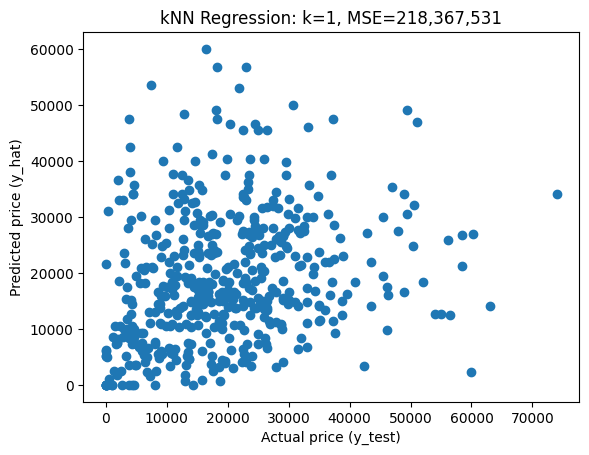

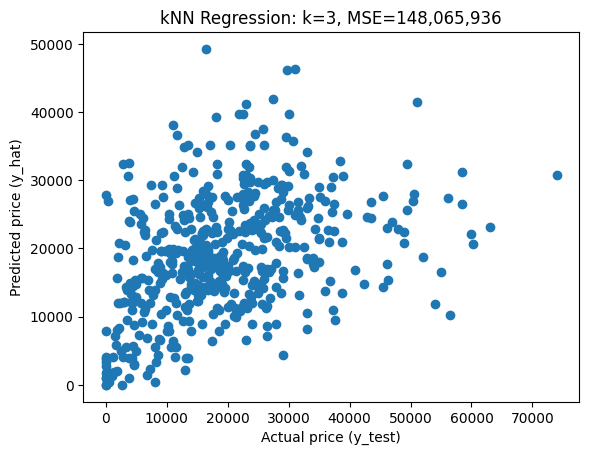

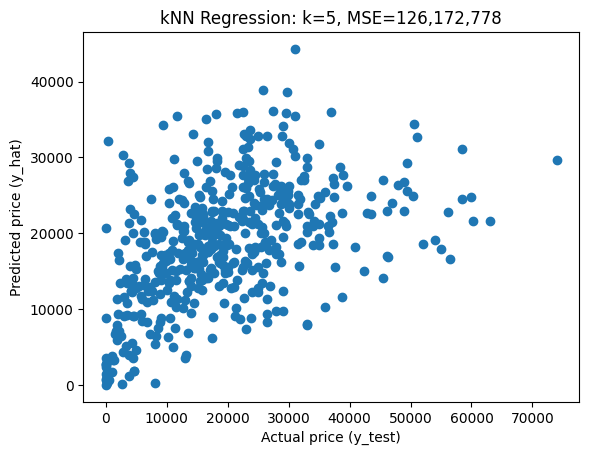

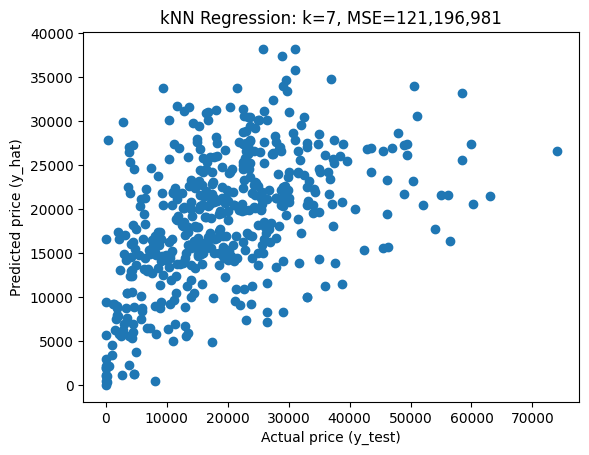

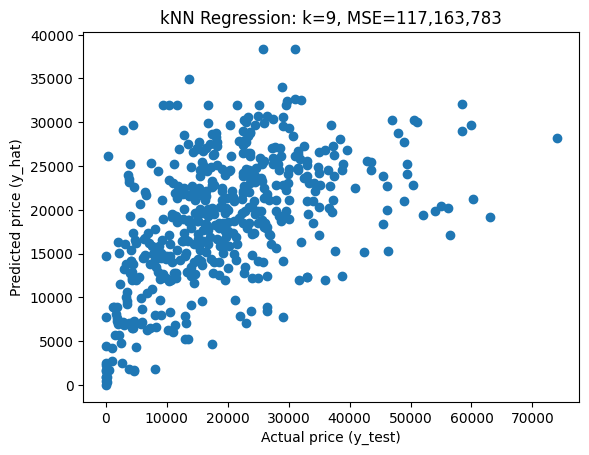

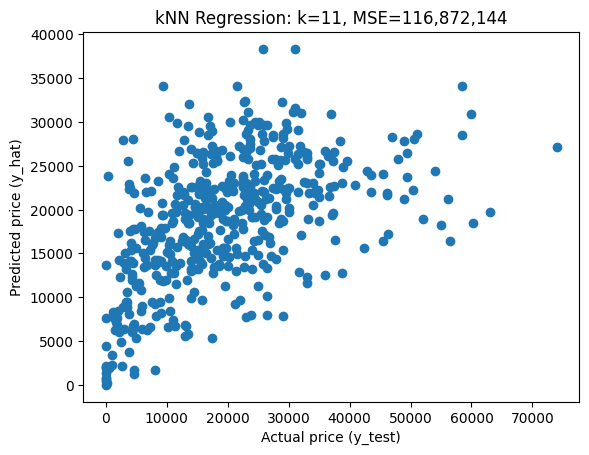

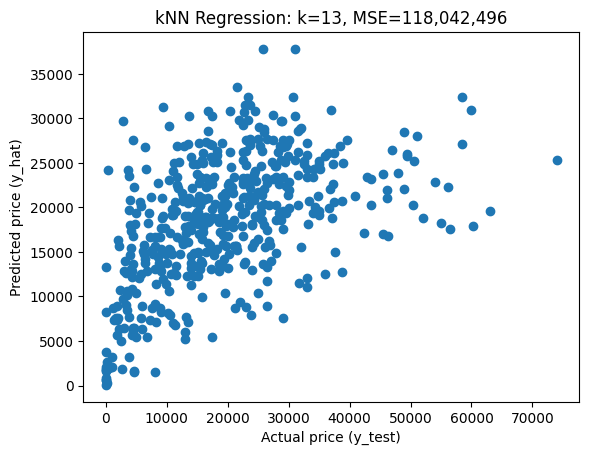

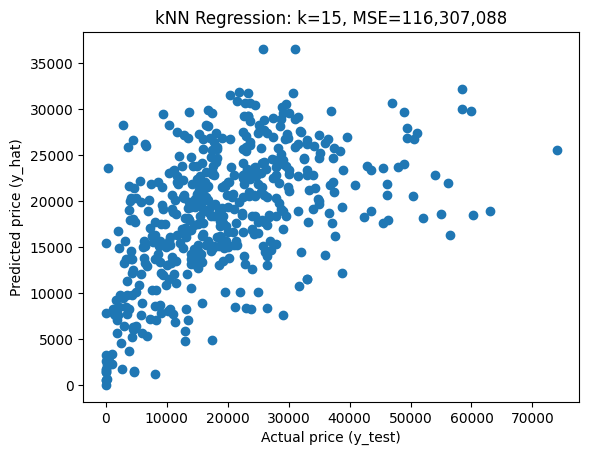

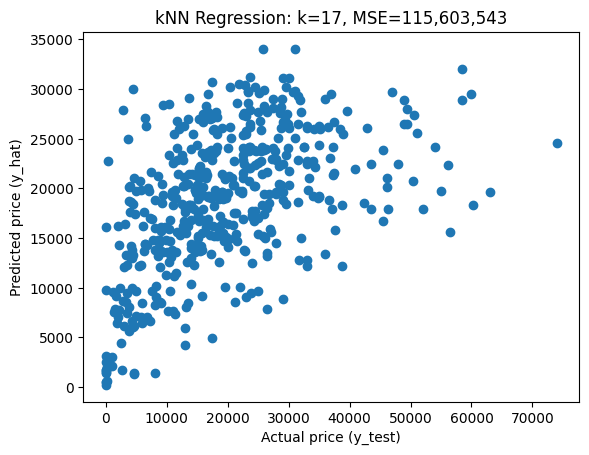

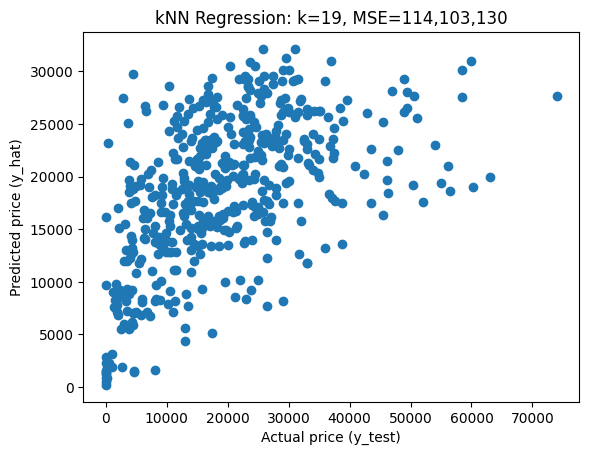

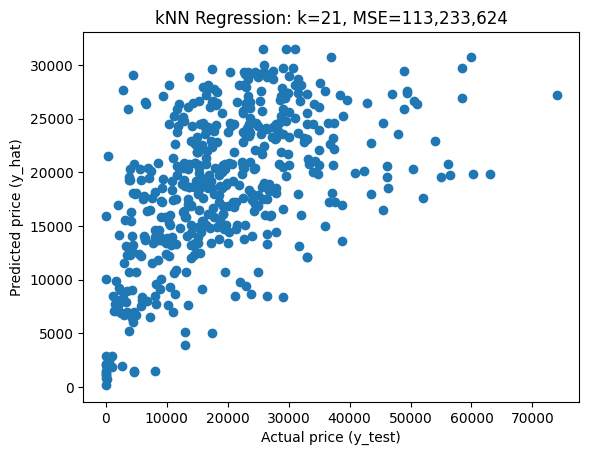

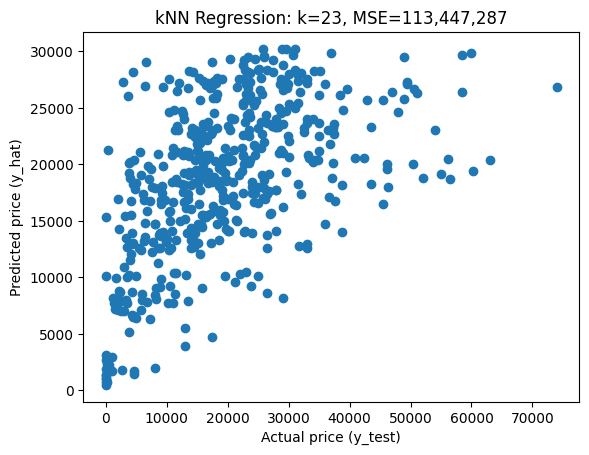

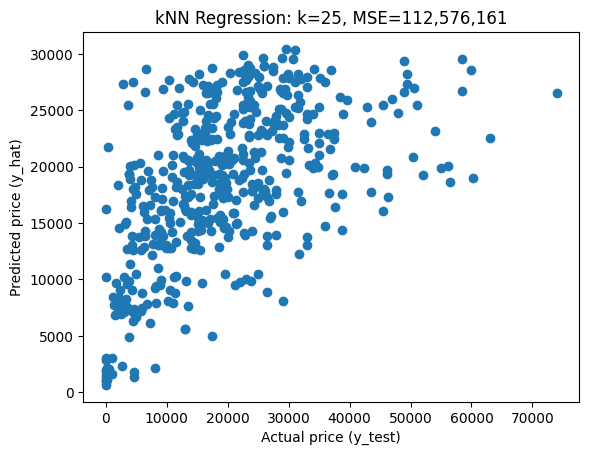

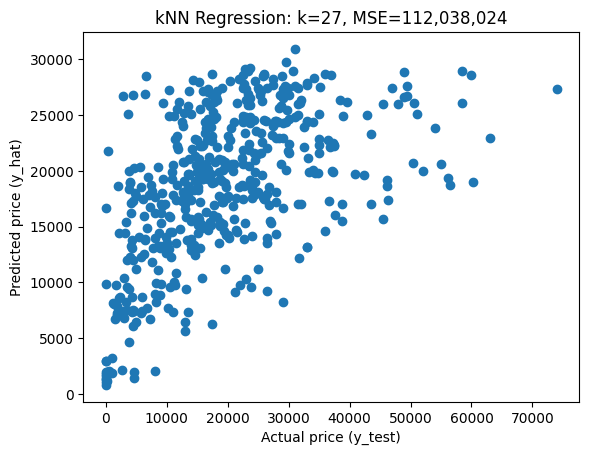

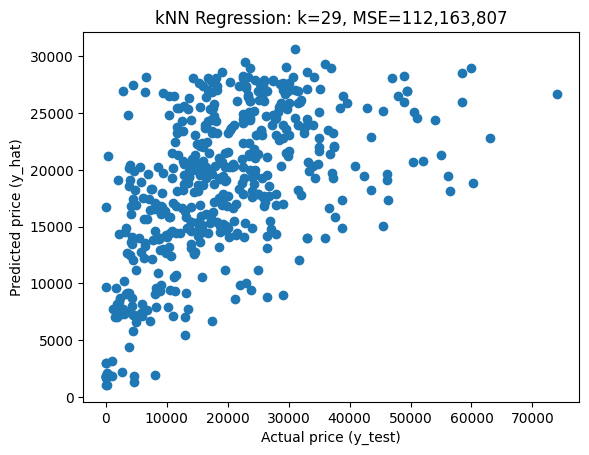

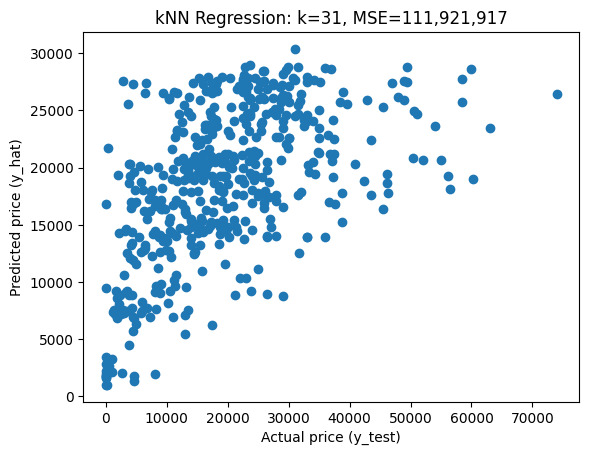

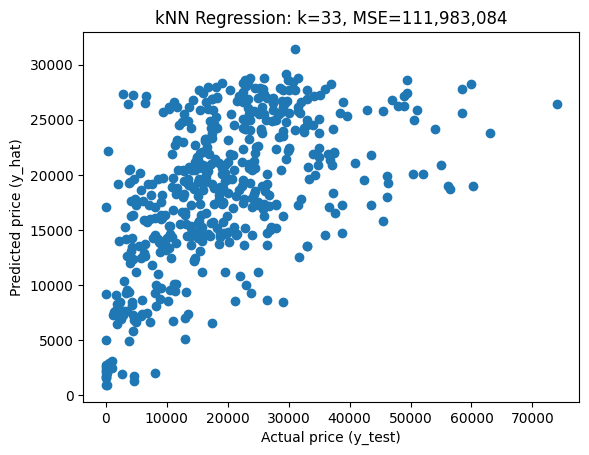

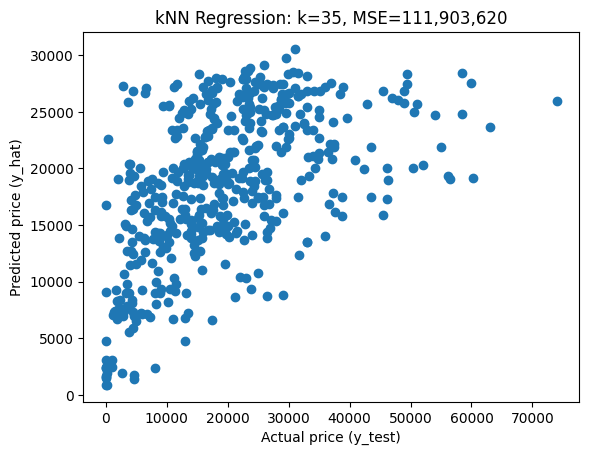

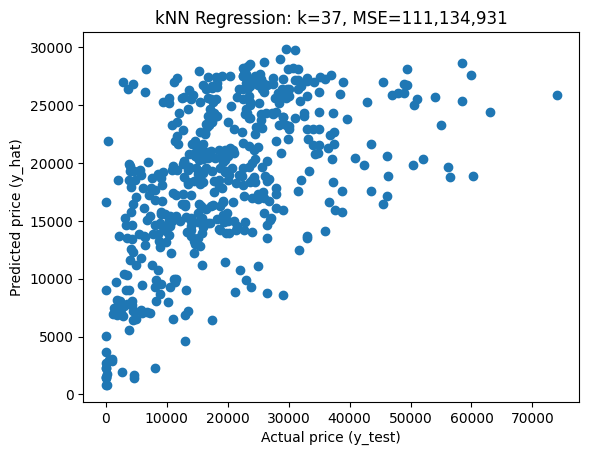

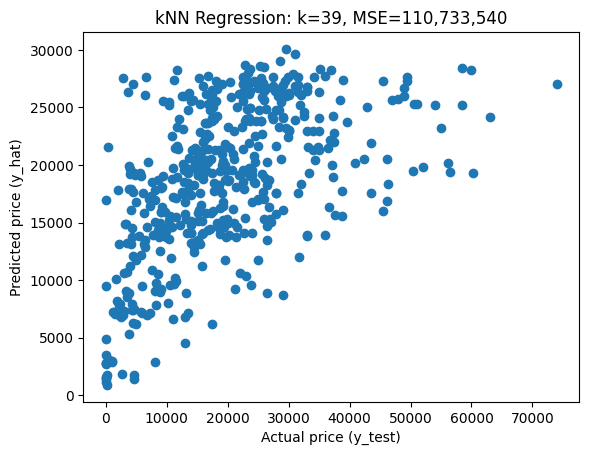

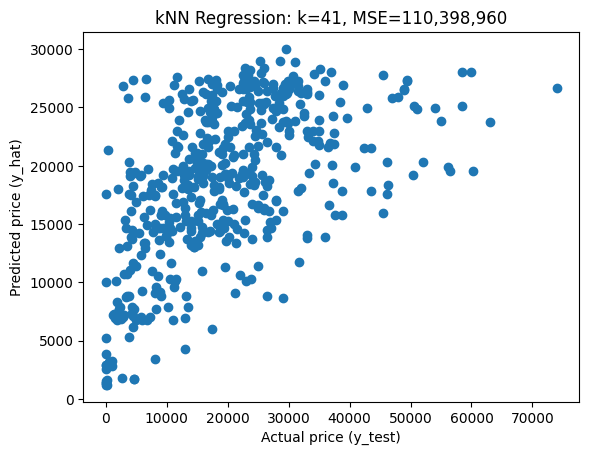

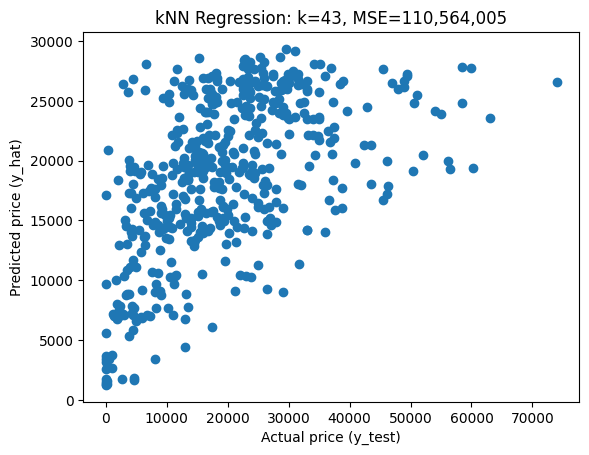

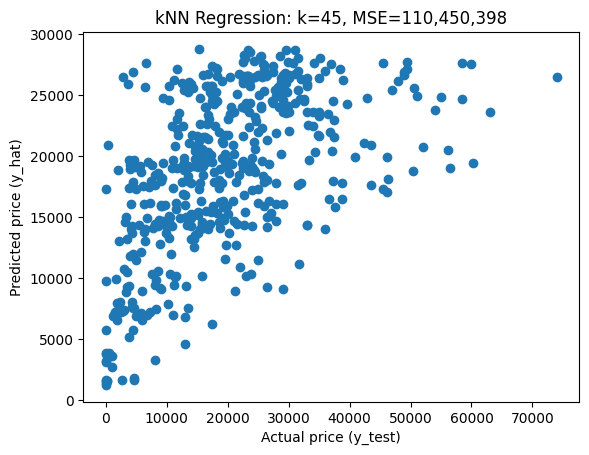

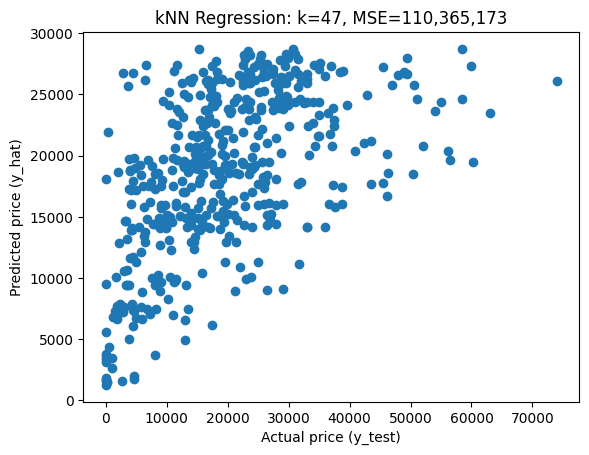

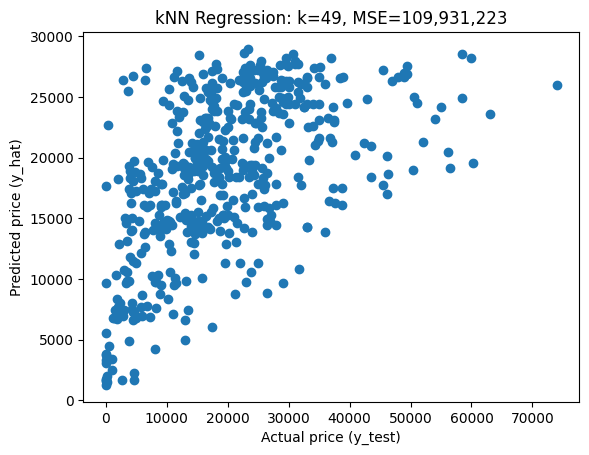

     k           mse
24  49  1.099312e+08
23  47  1.103652e+08
20  41  1.103990e+08
22  45  1.104504e+08
21  43  1.105640e+08
19  39  1.107335e+08
18  37  1.111349e+08
17  35  1.119036e+08
15  31  1.119219e+08
16  33  1.119831e+08
Best k = 49 with MSE = 109931222.53539108 and RMSE = 10484.809132043896


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

df = pd.read_csv("./data/USA_cars_datasets.csv")
df = df.loc[:, ["price", "year", "mileage"]]

print(df.head())
print("Shape:", df.shape)
print("NA counts:\n", df.isna().sum())

df = df.dropna(axis=0, how="any")

def minmax(s):
    return (s - s.min()) / (s.max() - s.min())

df["year_mm"] = minmax(df["year"])
df["mileage_mm"] = minmax(df["mileage"])

X = df[["year_mm", "mileage_mm"]].values
y = df["price"].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)

k_grid = list(range(1, 51, 2))  # odd k values
results = []

for k in k_grid:
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train, y_train)
    y_hat = model.predict(X_test)

    mse = mean_squared_error(y_test, y_hat)
    results.append((k, mse))

    plt.figure()
    plt.scatter(y_test, y_hat)
    plt.xlabel("Actual price (y_test)")
    plt.ylabel("Predicted price (y_hat)")
    plt.title(f"kNN Regression: k={k}, MSE={mse:,.0f}")
    plt.show()

results_df = pd.DataFrame(results, columns=["k", "mse"]).sort_values("mse")
print(results_df.head(10))

best_k = int(results_df.iloc[0]["k"])
best_mse = float(results_df.iloc[0]["mse"])
print("Best k =", best_k, "with MSE =", best_mse, "and RMSE =", np.sqrt(best_mse))

**Q4.** This question is a case study for $k$ nearest neighbor regression, using the `heart_failure_clinical_records_dataset.csv` data.

The data for the question include:

- age: age of the patient (years)
- anaemia: decrease of red blood cells or hemoglobin (boolean)
- high blood pressure: if the patient has hypertension (boolean)
- creatinine phosphokinase (CPK): level of the CPK enzyme in the blood (mcg/L)
- diabetes: if the patient has diabetes (boolean)
- ejection fraction: percentage of blood leaving the heart at each contraction (percentage)
- platelets: platelets in the blood (kiloplatelets/mL)
- sex: woman or man (binary)
- serum creatinine: level of serum creatinine in the blood (mg/dL)
- serum sodium: level of serum sodium in the blood (mEq/L)
- smoking: if the patient smokes or not (boolean)
- time: follow-up period (days)
- death event: if the patient deceased during the follow-up period (boolean)

1. Load the `./data/heart_failure_clinical_records_dataset.csv`. Are there any `NA`'s to handle? use `.drop()` to remove `time` from the dataframe.
2. Make a correlation matrix. What variables are strongly associated with a death event?
3. For the dummy variables `anaemia`, `diabetes`, `high_blood_pressure`, `sex`, and `smoking`, compute a summary table of `DEATH_EVENT` grouped by the variable. For which variables does a higher proportion of the population die when the variable takes the value 1 rather than 0?
4. On the basis of your answers from 2 and 3, build a matrix $X$ of the variables you think are most predictive of a death, and a variable $y$ equal to `DEATH_EVENT`.
5. Maxmin normalize all of the variables in `X`.
6. Split the sample into ~80% for training and ~20% for evaluation. (Try to use the same train/test split for the whole question, so that you're comparing apples to apples in the questions below.).
7. Determine the optimal number of neighbors for a $k$-NN classification or regression for the variables you selected.
8. OK, do steps 5 through 7 again, but use all of the variables (except `time`). Which model has the best Mean Squared Error? Which would you prefer to use in practice, if you had to predict `DEATH_EVENT`s? If you play with the selection of variables, how much does the RMSE change for your fitted model on the test data? Are more variables always better? Explain your findings.

When I repeated steps 5–7 using all variables (except time), I compared its test MSE/RMSE to the model using only the most predictive variables; the model with the lower test MSE is the better-performing one on unseen data. In practice I’d usually prefer the smaller selected-variable model if its RMSE is similar (or better), because it’s simpler to deploy and kNN can get worse when you add noisy features. When I changed which variables were included, the RMSE shifted, showing feature choice matters, but adding extra variables didn’t always improve results. So more variables are not always better for kNN because extra dimensions can dilute distances and hurt generalization.

In [15]:
df = pd.read_csv("./data/heart_failure_clinical_records_dataset.csv")
print("NA counts:\n", df.isna().sum())

df = df.dropna(axis=0, how="any")
df = df.drop(columns=["time"])

corr = df.corr(numeric_only=True)
print("Top correlations with DEATH_EVENT:")
print(corr["DEATH_EVENT"].sort_values(ascending=False))

dummy_vars = ["anaemia", "diabetes", "high_blood_pressure", "sex", "smoking"]
for v in dummy_vars:
    tab = df.groupby(v)["DEATH_EVENT"].mean()
    counts = df[v].value_counts().sort_index()
    print(f"\n{v}:")
    print("Counts:\n", counts)
    print("P(DEATH_EVENT=1 |", v, "):\n", tab)

def tune_knn_classifier(X, y, k_grid, random_state=42):
    # split once and reuse (as requested)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.20, random_state=random_state, stratify=y
    )

    
    scaler = MinMaxScaler()
    X_train_sc = scaler.fit_transform(X_train)
    X_test_sc = scaler.transform(X_test)

    out = []
    for k in k_grid:
        clf = KNeighborsClassifier(n_neighbors=k)
        clf.fit(X_train_sc, y_train)

        y_pred = clf.predict(X_test_sc)
        acc = accuracy_score(y_test, y_pred)

        
        y_prob1 = clf.predict_proba(X_test_sc)[:, 1]
        mse = mean_squared_error(y_test, y_prob1)
        rmse = np.sqrt(mse)

        out.append((k, acc, mse, rmse))

    out_df = pd.DataFrame(out, columns=["k", "accuracy", "mse(prob)", "rmse(prob)"])
    best_row = out_df.sort_values(["accuracy", "rmse(prob)"], ascending=[False, True]).iloc[0]

    best_k = int(best_row["k"])
    best_clf = KNeighborsClassifier(n_neighbors=best_k)
    best_clf.fit(X_train_sc, y_train)
    best_pred = best_clf.predict(X_test_sc)

    cm = confusion_matrix(y_test, best_pred)
    return out_df, best_row, cm

y = df["DEATH_EVENT"].values


selected_features = ["serum_creatinine", "ejection_fraction", "age", "serum_sodium"]
X_sel = df[selected_features].values

k_grid = list(range(1, 41, 2))

sel_results, sel_best, sel_cm = tune_knn_classifier(X_sel, y, k_grid)
print("\n=== Selected-features model ===")
print("Features used:", selected_features)
print(sel_results.sort_values(["accuracy", "rmse(prob)"], ascending=[False, True]).head(10))
print("Best row:\n", sel_best)
print("Confusion matrix:\n", sel_cm)

X_all = df.drop(columns=["DEATH_EVENT"]).values

all_results, all_best, all_cm = tune_knn_classifier(X_all, y, k_grid)
print("\n=== All-features model ===")
print(all_results.sort_values(["accuracy", "rmse(prob)"], ascending=[False, True]).head(10))
print("Best row:\n", all_best)
print("Confusion matrix:\n", all_cm)

NA counts:
 age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64
Top correlations with DEATH_EVENT:
DEATH_EVENT                 1.000000
serum_creatinine            0.294278
age                         0.253729
high_blood_pressure         0.079351
anaemia                     0.066270
creatinine_phosphokinase    0.062728
diabetes                   -0.001943
sex                        -0.004316
smoking                    -0.012623
platelets                  -0.049139
serum_sodium               -0.195204
ejection_fraction          -0.268603
Name: DEATH_EVENT, dtype: float64

anaemia:
Counts:
 anaemia
0    170
1    129
Name: count, dtype: int64
P

**Q7.** Let's do some very basic computer vision. We're going to import the MNIST handwritten digits data and use $k$-NN to predict values (i.e. "see/read").

1. To load the data, run the following code in a chunk:
```
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test
```
The `y_test` and `y_train` vectors, for each index `i`, tell you want number is written in the corresponding index in `X_train[i]` and `X_test[i]`. The value of `X_train[i]` and `X_test[i]`, however, is a 28$\times$28 array whose entries contain values between 0 and 256. Each element of the matrix is essentially a "pixel" and the matrix encodes a representation of a number. To visualize this, run the following code to see the first ten numbers:
```
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5): 
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()
```
OK, those are the data: Labels attached to handwritten digits encoded as a matrix.

2. What is the shape of `X_train` and `X_test`? What is the shape of `X_train[i]` and `X_test[i]` for each index `i`? What is the shape of `y_train` and `y_test`?
X_train has shape (60000, 28, 28) and X_test has shape (10000, 28, 28).
For any i, X_train[i] and X_test[i] each have shape (28, 28).
y_train has shape (60000,) and y_test has shape (10000,).
3. Use Numpy's `.reshape()` method to covert the training and testing data from a list of matrix into an vector of features. So, `X_test[index].reshape((1,784))` will convert the $index$-th element of `X_test` into a $28\times 28=784$-length row vector of values, rather than a matrix. Turn `X_train` into an $N \times 784$ matrix $X$ that is suitable for scikit-learn's kNN classifier where $N$ is the number of observations and $784=28*28$ (you could use, for example, a `for` loop).
4. Use the reshaped `X_test` and `y_test` data to create a $k$-nearest neighbor classifier of digit. What is the optimal number of neighbors $k$? If you can't determine this, play around with different values of $k$ for your classifier.
5. For the optimal number of neighbors, how well does your predictor perform on the test set? Report the accuracy, compute a confusion matrix, and explain your findings.
With the optimal choice k = 3, the kNN classifier achieved test accuracy = 0.9705 (97.05%), meaning it correctly classified about 97% of the 10,000 test images. The confusion matrix shows most mass on the diagonal (correct predictions), so performance is strong overall, with errors concentrated in a few digit pairs that have similar handwriting shapes.
6. For your confusion matrix, which mistakes are most likely? Do you find any interesting patterns?
The most likely mistakes are 7→1 (21 times), 4→9 (19 times), and 8→3 (16 times) (also 3→5 (13) and 2→7 (13)). A clear pattern is that the model confuses digits that look visually similar in pixel form—straight-stroke digits (7 vs 1) and similar-curve digits (4 vs 9, 8 vs 3)—rather than making random errors across all classes.
7. So, this is how computers "see." They convert an image into a matrix of values, that matrix becomes a vector in a dataset, and then we deploy ML tools on it as if it was any other kind of tabular data. To make sure you follow this, invent a way to represent a color photo in matrix form, and then describe how you could convert it into tabular data. (Hint: RGB color codes provide a method of encoding a numeric value that represents a color.)



In [17]:
import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import mnist
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

df = mnist.load_data('minst.db')
train, test = df
X_train, y_train = train
X_test, y_test = test

print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("One image shape:", X_train[0].shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

X_train_2d = X_train.reshape((X_train.shape[0], 784))
X_test_2d = X_test.reshape((X_test.shape[0], 784))

X_train_2d = X_train_2d / 255.0
X_test_2d = X_test_2d / 255.0

k_grid = [1, 3, 5, 7, 9, 11]
best = None

for k in k_grid:
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X_train_2d, y_train)
    pred = clf.predict(X_test_2d)
    acc = accuracy_score(y_test, pred)
    print(f"k={k}, accuracy={acc:.4f}")
    if best is None or acc > best[1]:
        best = (k, acc, pred)

best_k, best_acc, best_pred = best
print("\nBest k:", best_k, "Best accuracy:", best_acc)

cm = confusion_matrix(y_test, best_pred)
print("\nConfusion matrix:\n", cm)

2026-02-20 01:50:28.806077: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2026-02-20 01:50:30.322442: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2026-02-20 01:50:33.467401: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
X_train: (60000, 28, 28)
X_test: (10000, 28, 28)
One image shape: (28, 28)
y_train: (60000,)
y_test: (10000,)
k=1, accuracy=0.9691
k=3, accuracy=0.9705
k=5, accuracy=0.9688
k=7, accuracy=0.9694
k=9, accuracy=0.9659
k=11, accuracy=0.9668

Best k: 3 Best accuracy: 0.9705

Confusion matrix:
 [[ 974    1    1    0    0    1    2    1    0    0]
 [   0 1133    2    0    0    0    0    0    0    0]
 [  10    9  996    2    0    0    0   13    2    0]
 [   0    2    4  976    1   13    1    7    3    3]
 [   1    6    0    0  950    0    4    2    0   19]
 [   6    1    0   11    2  859    5    1    3    4]
 [   5    3    0    0    3    3  944    0    0    0]
 [   0   21    5    0    1    0    0  991    0   10]
 [   8    2    4   16    8   11    3    4  914    4]
 [   4    5    2    8    9    2    1    8    2  968]]
